# Data Exploration

In this notebook, we will explore some of our features in greater depth. 

We have some basic information from the competition description

## Feature Overview

Features
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

amount_tsh : Total static head (amount water available to waterpoint) - **DONE**

date_recorded : The date the row was entered

funder : Who funded the well - **DONE**

gps_height : Altitude of the well

installer : Organization that installed the well - **DONE**

longitude : GPS coordinate

latitude : GPS coordinate

wpt_name : Name of the waterpoint if there is one - **DONE**

num_private : ? - **In progress, still don't know what this is**

basin : Geographic water basin - **DONE**

subvillage : Geographic location - **DONE**

region : Geographic location - **DONE**

region_code : Geographic location (coded) - **DONE**

district_code : Geographic location (coded) - **DONE**

lga : Geographic location - **DONE**

ward : Geographic location - **DONE**

population : Population around the well - **DONE**

public_meeting : True/False - **DONE**

recorded_by : Group entering this row of data **DONE**

scheme_management : Who operates the waterpoint - **DONE**

scheme_name : Who operates the waterpoint - **DONE**

permit : If the waterpoint is permitted - **DONE**

construction_year : Year the waterpoint was constructed - **DONE**

extraction_type : The kind of extraction the waterpoint uses - **DONE**

extraction_type_group : The kind of extraction the waterpoint uses - **DONE**

extraction_type_class : The kind of extraction the waterpoint uses - **DONE**

management : How the waterpoint is managed

management_group : How the waterpoint is managed

payment : What the water costs

payment_type : What the water costs

water_quality : The quality of the water

quality_group : The quality of the water

quantity : The quantity of water

quantity_group : The quantity of water

source : The source of the water

source_type : The source of the water

source_class : The source of the water

waterpoint_type : The kind of waterpoint

waterpoint_type_group : The kind of waterpoint

Labels

There are three possible values:

- functional : the waterpoint is operational and there are no repairs needed
- functional needs repair : the waterpoint is operational, but needs repairs
- non functional : the waterpoint is not operational

Let's load the data and take a look at these in more detail for the training data.

## Loading Data

In [1]:
# imports
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
# load in training and submission data
df_train = pd.read_csv('train_features.csv', index_col=0).join(pd.read_csv('train_labels.csv', index_col=0))
df_test = pd.read_csv('test_features.csv', index_col=0)
df_train.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


## Data Exploration

Let's start by looking at our target variable, which I would suspect has some class imbalance issues.

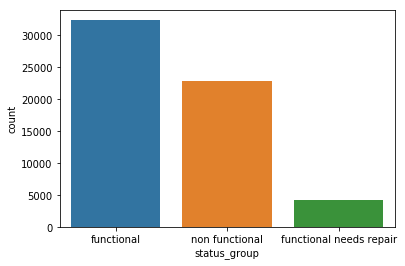

In [10]:
# pump status counts
sns.countplot(df_train['status_group'])

We should keep this in mind moving forward. Functional pumps that need repair are underrepresented in the data, and modeling corrections may be necessary to counter this imbalance.

### Funding and Installation 

Let's first look at what group funded and what group installed these waterpoints. It would seem natural that certain groups would be more adept at financing and installation than others.

In [12]:
df_train['funder'].value_counts(normalize=True)

Government Of Tanzania        0.162898
Danida                        0.055841
Hesawa                        0.039487
Rwssp                         0.024639
World Bank                    0.024191
Kkkt                          0.023079
World Vision                  0.022344
Unicef                        0.018955
Tasaf                         0.015727
District Council              0.015117
Dhv                           0.014866
Private Individual            0.014812
Dwsp                          0.014543
0                             0.013933
Norad                         0.013718
Germany Republi               0.010939
Tcrs                          0.010795
Ministry Of Water             0.010580
Water                         0.010455
Dwe                           0.008679
Netherlands                   0.008428
Hifab                         0.008070
Adb                           0.008034
Lga                           0.007926
Amref                         0.007621
Fini Water               

In [25]:
df_train['installer'].value_counts(normalize=True)

DWE                        0.312171
Government                 0.032738
RWE                        0.021634
Commu                      0.019015
DANIDA                     0.018836
KKKT                       0.016109
Hesawa                     0.015069
0                          0.013938
TCRS                       0.012683
Central government         0.011158
CES                        0.010943
Community                  0.009920
DANID                      0.009902
District Council           0.009884
HESAWA                     0.009669
World vision               0.007319
LGA                        0.007319
WEDECO                     0.007122
TASAF                      0.007104
District council           0.007032
Gover                      0.006871
AMREF                      0.005902
TWESA                      0.005669
WU                         0.005400
Dmdd                       0.005148
ACRA                       0.004987
World Vision               0.004843
SEMA                       0

A couple takeaways here.

First, these features have large Arity, which will impose computational costs if we try to include all of them as labels. It's probably more worthwhile to include only the top few entities, and encode the rest as other.

Second, '0' is strangely a label in both columns. This likely represents and unknown value, and the lack of knowledge could prove to be a valuable feature.

Let's keep going by examining the target distribution between funders.

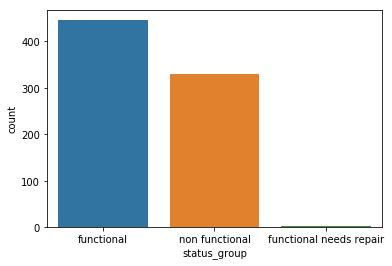

In [14]:
# target distribution, funder unknown
sns.countplot(df_train['status_group'][df_train['funder']=='0']);

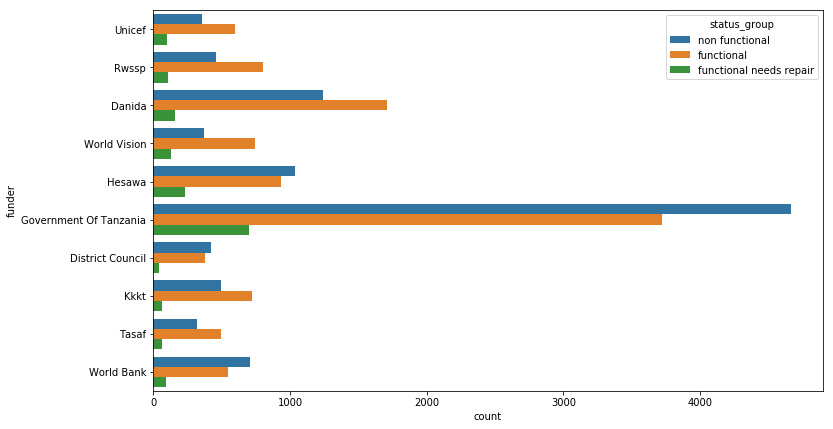

In [22]:
top_funders = df_train['funder'].value_counts().index[:10]
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=df_train[df_train['funder'].isin(list(top_funders))], y='funder',hue='status_group',ax=ax);

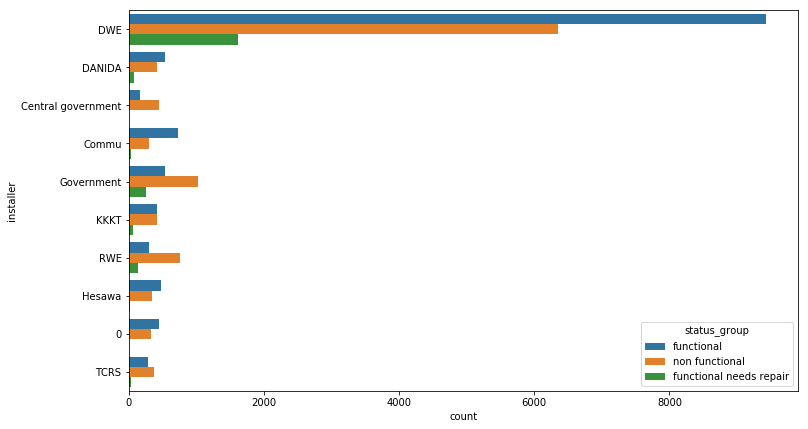

In [24]:
top_installers = df_train['installer'].value_counts(sort=True).index[:10]
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=df_train[df_train['installer'].isin(list(top_installers))], y='installer',hue='status_group',ax=ax);

There is clearly some variance in outcome between funders/installers. During the data wrangling process, we will

1. Encode a new variable for funding unknown / installer unknown.
2. Encode the top 20 funders and installers by name, encode all else as 'other'

Let's see if we could instead map these to common entities.

In [303]:
def map_installer(installer):
    
    unknown = ['0', 'unknown']
    
    if installer in unknown:
        return 'unknown'
    
    government = ['government ', 'government', 'dwe', 'hesawa', 'rwe', 'central government', 'lga',
                 'district council', 'gover', 'gove', 'gov', 'district water department',
                 'sengerema water department', 'distri', 'centr', 'distric water department',
                 'tasaf']
    
    if installer in government:
        return 'government'
    
    community = ['community', 'commu', 'villagers', 'twesa']
    
    if installer in community:
        return 'community'
    
    religious = ['church of disciples', 'kkkt', 'world vision', 'rc church', 'rc', 'tcrs',
                'dmdd']
    
    if installer in religious:
        return 'religious'
    
    international = ['norad', 'fini water', 'danida', 'danid', 'ces', 'kuwait',
                    'finw']
    
    if installer in international:
        return 'international'
    
    private = ['private', 'privat', 'kiliwater', 'wedeco']
    
    if installer in private:
        return 'private'
    
    aid = ['roman', 'amref', 'world bank', 'unicef', 'oxfam']
    
    if installer in aid:
        return 'aid'
    
    
    return 'other'
    
    

In [305]:
# df_train['installer'].str.lower().apply(map_installer).value_counts()
pd.crosstab(df_train['funder'].str.lower().apply(map_installer), df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
funder,,,
aid,0.516306,0.074459,0.409235
community,0.645714,0.174286,0.180000
government,0.444124,0.093814,0.462062
international,0.456717,0.076266,0.467017
other,0.557635,0.071185,0.371180
private,0.706612,0.016529,0.276860
religious,0.602892,0.067906,0.329202
unknown,0.572343,0.003841,0.423816


### Total Static Head

Total static head is loosely described in the overview as the 'total amount of water available to a waterpoint'.

Let's take a look at the distribution in our training data. It also seems like there's a lot of zeros, which might be unknown values?

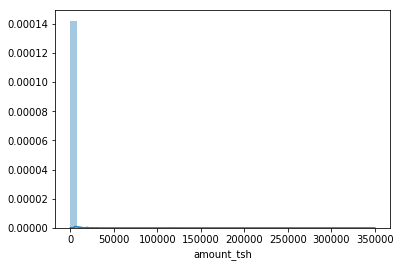

In [28]:
sns.distplot(df_train['amount_tsh'])

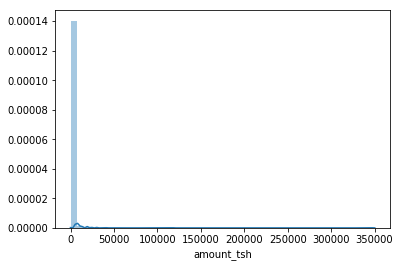

In [33]:
# count zeros
df_train['amount_tsh'][df_train['amount_tsh'] == 0.0].shape[0]

# replot distribution for total static head not equal to zero
sns.distplot(df_train['amount_tsh'][df_train['amount_tsh'] != 0.0])

In [34]:
df_train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

This is going to be a tricky one. Based on the distribution of amount_tsh, during data wrangling we will

1. Create a binary variable for total static head equal to zero 
2. Include log(amount_tsh), given the skew of the distribution

### Waterpoint Name

In [40]:
df_train['wpt_name'].value_counts(normalize=True)

none                      0.059983
Shuleni                   0.029428
Zahanati                  0.013973
Msikitini                 0.009007
Kanisani                  0.005438
Bombani                   0.004562
Sokoni                    0.004377
Ofisini                   0.004276
School                    0.003502
Shule Ya Msingi           0.003350
Shule                     0.002559
Sekondari                 0.002458
Muungano                  0.002239
Mkombozi                  0.001869
Madukani                  0.001751
Mbugani                   0.001582
Hospital                  0.001582
Upendo                    0.001566
Kituo Cha Afya            0.001515
Mkuyuni                   0.001481
Umoja                     0.001414
Center                    0.001397
Ccm                       0.001364
Kisimani                  0.001313
Mtakuja                   0.001279
Ofisi Ya Kijiji           0.001279
Tankini                   0.001229
Songambele                0.001111
Bwawani             

In [41]:
# hmm why would two water points have the same name?
df_train[df_train['wpt_name'] == 'Shuleni']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
58500,0.0,2011-10-04,Unicef,1510,DWE,34.586901,-8.980014e+00,Shuleni,0,Rufiji,Mkanivega,Iringa,11,4,Njombe,Usuka,350,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
30423,0.0,2012-10-18,Ifad,1185,IFAD,34.190575,-1.609691e+00,Shuleni,0,Lake Victoria,Shule,Mara,20,3,Musoma Rural,Buswahili,544,NaN,GeoData Consultants Ltd,Parastatal,NaN,False,2002,gravity,gravity,gravity,parastatal,parastatal,unknown,unknown,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,hand pump,hand pump,non functional
54248,0.0,2011-04-10,Kkkt,0,KKT C,36.557029,-6.372797e+00,Shuleni,0,Wami / Ruvu,Chang'Ombe,Dodoma,1,1,Mpwapwa,Kimagai,0,True,GeoData Consultants Ltd,VWC,Bumi,True,0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
62341,0.0,2013-01-22,Hesawa,1191,DWE,33.356471,-2.063494e+00,Shuleni,0,Lake Victoria,Kabarongo,Mara,20,4,Bunda,Igundu,804,False,GeoData Consultants Ltd,Parastatal,NaN,False,2000,gravity,gravity,gravity,parastatal,parastatal,unknown,unknown,soft,good,dry,dry,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,non functional
2915,0.0,2013-03-14,Wfp,1302,WFP,36.778621,-2.556180e+00,Shuleni,0,Internal,Ewerendeke,Arusha,2,6,Longido,Namanga,370,True,GeoData Consultants Ltd,Parastatal,NaN,NaN,2012,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
17687,0.0,2011-08-03,Government Of Tanzania,385,RWE,37.443110,-6.299767e+00,Shuleni,0,Wami / Ruvu,Kipogoro,Morogoro,5,6,Mvomero,Mvomero,1,True,GeoData Consultants Ltd,VWC,Vugiro,True,1974,submersible,submersible,submersible,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
58126,0.0,2011-04-03,Government Of Tanzania,0,Government,33.014762,-8.436398e+00,Shuleni,0,Lake Rukwa,Majengo,Mbeya,12,1,Chunya,Mbangala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
41845,50.0,2013-02-22,Amref,232,Amref,39.778832,-1.060672e+01,Shuleni,0,Ruvuma / Southern Coast,Mjini,Mtwara,99,1,Mtwara Rural,Njengwa,150,True,GeoData Consultants Ltd,VWC,Hinju water supply,True,2011,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


In [233]:
top_names = df_train['wpt_name'].str.lower().isin(df_train['wpt_name'].str.lower().value_counts().index[:50])
pd.crosstab(df_train['wpt_name'].str.lower()[top_names], df_train['status_group'][top_names])#, normalize='index')

status_group,functional,functional needs repair,non functional
wpt_name,,,
amani,29,7,11
bombani,158,21,92
bondeni,30,8,23
bwawani,23,6,37
ccm,32,7,42
center,30,3,50
church,21,1,23
darajani,17,0,26
dispensary,20,4,19


It seems that some water pumps are named for the type of location. For example 'Shuleni' means 'school' in Swahili. In our data wrangling process, let's

1. Convert all names to lowercase
2. Keep the top 30 location names (this will include none, so no need for binary encoding), and encode everything else as other


### num_private

No variable description is given in the competition details for this feature. I have no idea what this means to be honest.

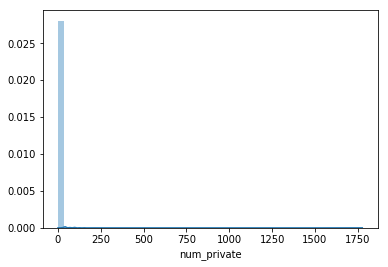

In [48]:
sns.distplot(df_train['num_private'])

### Basin

It would make sense that geographic water basins may affect pump functionality.

In [53]:
df_train['basin'].value_counts(normalize=True)

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                     0.134276
Internal                   0.131061
Lake Tanganyika            0.108283
Wami / Ruvu                0.100791
Lake Nyasa                 0.085606
Ruvuma / Southern Coast    0.075640
Lake Rukwa                 0.041313
Name: basin, dtype: float64

This feature is a manageable size, we can leave it as is.

### Subvillage

Similar intent for subvillage, let's see if this feature is a manageable size.

In [56]:
df_train['subvillage'].str.lower().value_counts()

madukani         508
shuleni          506
majengo          502
kati             373
mtakuja          262
sokoni           232
m                187
muungano         172
mbuyuni          164
mlimani          152
songambele       147
miembeni         134
msikitini        134
1                132
kibaoni          114
kanisani         111
i                109
mapinduzi        109
mjini            108
mjimwema         108
mkwajuni         104
mwenge           102
mabatini          98
azimio            98
mission           95
mbugani           95
bwawani           91
bondeni           90
chang'ombe        88
zahanati          86
                ... 
ng'ong'wa          1
kyou               1
ikuluhi            1
uluguruni          1
mwamakumbai a      1
mwamaduhi          1
making'inya        1
munini             1
kanyabuguru        1
mashana            1
muhelo             1
mwabunga           1
mwamanongu         1
mamele             1
nanda b            1
nambunde           1
kigangi      

Yeah... can't include all of those. Let's just include the top 50 and encode everything else as other.

### Region / Region Code / District Code

In [66]:
df_train['region'].value_counts(normalize=True)

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64

The size of regions isn't too bad, we can leave these as is.

In [69]:
print ('Unique Region Codes:', len(df_train['region_code'].value_counts(normalize=True)))
print ('Unique Regions:', len(df_train['region'].value_counts(normalize=True)))

Unique Region Codes: 27
Unique Regions: 21


Hmmm lack of consistency between regions and region codes is interesting. It seems that some region names are specified by more than one code. We should one hot encode all region codes.

In [74]:
df_train['region_code'][df_train['region']=='Morogoro'].value_counts()

5    4006
Name: region_code, dtype: int64

In [78]:
df_train['district_code'].value_counts(normalize=True)

1     0.205438
2     0.188098
3     0.168316
4     0.151498
5     0.073333
6     0.068586
7     0.056279
8     0.017559
30    0.016751
33    0.014714
53    0.012542
43    0.008502
13    0.006582
23    0.004933
63    0.003283
62    0.001835
60    0.001061
0     0.000387
80    0.000202
67    0.000101
Name: district_code, dtype: float64

Again, lack of size means we can one hot encode all these districts.

### lga

I don't know what exactly this is representing, but let's check it out.

In [80]:
df_train['lga'].value_counts(normalize=True)

Njombe              0.042138
Arusha Rural        0.021077
Moshi Rural         0.021061
Bariadi             0.019815
Rungwe              0.018620
Kilosa              0.018418
Kasulu              0.017626
Mbozi               0.017407
Meru                0.016987
Bagamoyo            0.016785
Singida Rural       0.016751
Kilombero           0.016145
Same                0.014764
Kibondo             0.014714
Kyela               0.014461
Kahama              0.014074
Magu                0.013872
Kigoma Rural        0.013872
Maswa               0.013620
Karagwe             0.012980
Mbinga              0.012626
Iringa Rural        0.012256
Serengeti           0.012054
Lushoto             0.011684
Namtumbo            0.011684
Songea Rural        0.011667
Mpanda              0.011431
Mvomero             0.011296
Ngara               0.011263
Ulanga              0.011195
                      ...   
Newala              0.003889
Bahi                0.003771
Kisarawe            0.003754
Temeke        

A couple observations

1. Some of these values contain either 'urban' or 'rural'. This could be valuable and we should capture it with two binary variables.
2. There are too many values to one hot encode all. We'll work with the top 30, and encode everything else as 'other'.

### Ward

In [83]:
df_train['ward'].value_counts(normalize=True)

Igosi               0.005168
Imalinyi            0.004242
Siha Kati           0.003906
Mdandu              0.003889
Nduruma             0.003653
Mishamo             0.003418
Kitunda             0.003418
Msindo              0.003384
Chalinze            0.003300
Maji ya Chai        0.003199
Usuka               0.003148
Ngarenanyuki        0.002896
Chanika             0.002879
Vikindu             0.002727
Mtwango             0.002576
Matola              0.002441
Zinga/Ikerege       0.002374
Wanging'ombe        0.002340
Maramba             0.002340
Itete               0.002306
Magomeni            0.002273
Ifakara             0.002256
Kikatiti            0.002256
Olkokola            0.002239
Maposeni            0.002189
Mvomero             0.002172
Igongolo            0.002172
Mlangali            0.002104
Nkoma               0.002054
Mahongole           0.002037
                      ...   
Matarawe            0.000017
Uchindile           0.000017
Rasbura             0.000017
Nsemulwa      

Way too many features to include by one hot encoding. What might be valuable, however, is the fact that more than one waterpoint exists in a given ward. Let's encode that as a new variable.

### Population

Population surrounding a water point should definitely have an impact. Let's start by taking a look at the distribution of population. I also noticed a lot of zeros, let's see how many of those exist.

Observations with "Zero" population 21381


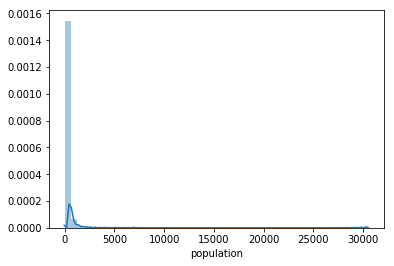

In [92]:
print ('Observations with "Zero" population', len(df_train['population'][df_train['population']==0]))
sns.distplot(df_train['population'])

Seems like there's too many observations with a population of zero. Let's encode these as new variable 'population_unknown'. Going forward, we can also look into either bucketing or otherwise transforming this distribution.

### Public Meeting

I see some NaNs in here, let's just clarify what values exist for this feature. We'll encode any nulls in a new binary variable, and then fill them with False.

In [96]:
print ('Unknown values', df_train['public_meeting'].isnull().sum())
df_train['public_meeting'].value_counts()

Unknown values 3334


True     51011
False     5055
Name: public_meeting, dtype: int64

### Recorded By

There's no information in this feature. We'll drop it during wrangling.

In [101]:
df_train['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

### Scheme Management / Scheme Name

Both of these are simply described as 'who operates the waterpoint', which doesn't tell us much. Let's take a look at the values.

In [103]:
df_train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [116]:
df_train['scheme_name'].value_counts()

K                                          682
None                                       644
Borehole                                   546
Chalinze wate                              405
M                                          400
DANIDA                                     379
Government                                 320
Ngana water supplied scheme                270
wanging'ombe water supply s                261
wanging'ombe supply scheme                 234
I                                          229
Bagamoyo wate                              229
Uroki-Bomang'ombe water sup                209
N                                          204
Kirua kahe gravity water supply trust      193
Machumba estate pipe line                  185
Makwale water supplied sche                166
Kijiji                                     161
S                                          154
Losaa-Kia water supply                     152
Handeni Trunk Main(H                       152
mtwango water

Scheme Management we can keep and one hot encode later. Scheme name doesn't seem that useful. We're going to drop it for now. Maybe we can extract more information from it later.

### Construction Year

Older pumps intuitively should require more repairs. Let's take a look at the distribution of construction year.

I noticed several 0s in the data, which indicates missing values in one form or another.

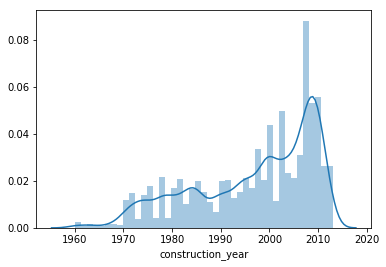

In [119]:
sns.distplot(df_train['construction_year'][df_train['construction_year'] > 1900]);

I think it would be best to bin by construction year, in increments of 5. This will also allow us to encode the zeros as missing values in another binary variable.

### Extraction Type

There are three different variables for extraction type, which seem to roll up in categorization to one another. Let's take a look at the values.

In [123]:
df_train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [219]:
pd.crosstab(df_train['extraction_type'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
extraction_type,,,
afridev,0.677966,0.023729,0.298305
cemo,0.500000,0.100000,0.400000
climax,0.250000,0.000000,0.750000
gravity,0.599253,0.100859,0.299888
india mark ii,0.603333,0.032917,0.363750
india mark iii,0.448980,0.010204,0.540816
ksb,0.496820,0.018375,0.484806
mono,0.377661,0.045026,0.577312
nira/tanira,0.664827,0.078612,0.256561


In [124]:
df_train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [125]:
df_train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

Let's just keep the most granular feature, extraction_type, and drop the other two.

### Management 

Good management should prevent deterioration. Let's take a look at what information we have.

In [127]:
df_train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [218]:
pd.crosstab(df_train['management'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
management,,,
company,0.389781,0.021898,0.588321
other,0.598341,0.065166,0.336493
other - school,0.232323,0.010101,0.757576
parastatal,0.576923,0.119344,0.303733
private operator,0.748858,0.022324,0.228818
trust,0.589744,0.076923,0.333333
unknown,0.399287,0.048128,0.552585
vwc,0.504234,0.068902,0.426864
water authority,0.493363,0.057522,0.449115


In [128]:
df_train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

Again, we'll probably just keep the more granular feature, 'management'.

### Payment / Payment Type

Seems likely that payment types would be related to the condition of a waterpoint. Let's take a look at the values in our training data.

In [130]:
df_train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [217]:
pd.crosstab(df_train['payment'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
payment,,,
never pay,0.448911,0.075233,0.475856
other,0.579696,0.111954,0.308349
pay annually,0.752334,0.067820,0.179846
pay monthly,0.660482,0.111687,0.227831
pay per bucket,0.677796,0.045520,0.276683
pay when scheme fails,0.620593,0.070772,0.308636
unknown,0.432512,0.052961,0.514527


In [131]:
df_train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Again, this information appears to be redundant. We'll get rid of 'payment_type'.

### Water Quality and Quantity

In [132]:
df_train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [216]:
pd.crosstab(df_train['water_quality'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
water_quality,,,
coloured,0.502041,0.110204,0.387755
fluoride,0.755000,0.065000,0.180000
fluoride abandoned,0.352941,0.000000,0.647059
milky,0.544776,0.017413,0.437811
salty,0.457166,0.046334,0.496499
salty abandoned,0.513274,0.212389,0.274336
soft,0.565941,0.076823,0.357236
unknown,0.140725,0.018657,0.840618


In [134]:
df_train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Seems like quality group is just an aggregation of water quality, we will drop 'quality_group'.

In [136]:
df_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [137]:
df_train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These properties are also redundant, we will drop 'quantity_group'.

### Source

I expect a similar pattern is at work with the source columns, let's check the values to make sure.

In [138]:
df_train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [215]:
pd.crosstab(df_train['source'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
source,,,
dam,0.385671,0.036585,0.577744
hand dtw,0.568650,0.019451,0.411899
lake,0.211765,0.015686,0.772549
machine dbh,0.489571,0.044334,0.466095
other,0.594340,0.004717,0.400943
rainwater harvesting,0.603922,0.136819,0.259259
river,0.568560,0.127029,0.304411
shallow well,0.494769,0.056883,0.448348
spring,0.622290,0.074966,0.302744


In [140]:
df_train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [141]:
df_train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

Again, these properties are redundant, we will drop 'source_type' and 'source_class'.

### Waterpoint Type

Again, we're going to drop the less granular group feature here.

In [142]:
df_train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [143]:
df_train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [214]:
pd.crosstab(df_train['waterpoint_type'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,0.724138,0.017241,0.258621
communal standpipe,0.621485,0.079237,0.299278
communal standpipe multiple,0.366213,0.106177,0.527609
dam,0.857143,0.000000,0.142857
hand pump,0.617852,0.058840,0.323307
improved spring,0.718112,0.108418,0.173469
other,0.131661,0.045925,0.822414


### Longitude, Latitude, and Elevation

We should be able to get some good information from geographic location of the waterpoints. Although it's possible that much of it is contained already in other features.

Let's start by looking at the data to verify it seems correct. A quick Google search reveals the following 

Longitude: 29.3399975929 to 40.31659

Latitude: -11.7209380022 to -0.95

In [157]:
df_train[['longitude', 'latitude', 'gps_height']].describe()

,longitude,latitude,gps_height
count,59400.000000,5.940000e+04,59400.000000
mean,34.077427,-5.706033e+00,668.297239
std,6.567432,2.946019e+00,693.116350
min,0.000000,-1.164944e+01,-90.000000
25%,33.090347,-8.540621e+00,0.000000
50%,34.908743,-5.021597e+00,369.000000
75%,37.178387,-3.326156e+00,1319.250000
max,40.345193,-2.000000e-08,2770.000000


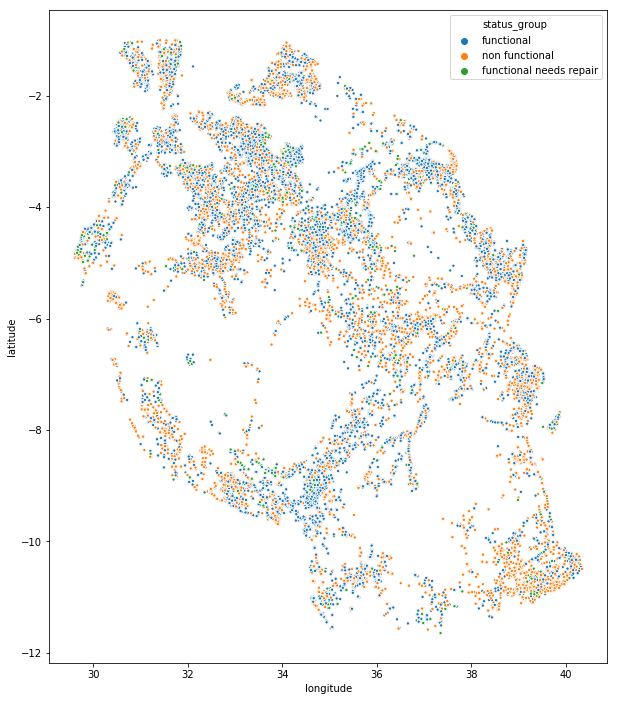

In [181]:
fig,ax = plt.subplots(figsize=(10,12))
sns.scatterplot(data=df_train[df_train['longitude']>25], x='longitude', y='latitude', 
                hue='status_group', 
                ax=ax,
               **{'s' : 10})

In [200]:
# how is our accuracy if we just use KNN?
from sklearn.neighbors import KNeighborsClassifier
geo_data = df_train[['longitude', 'latitude']]#, 'gps_height']]

knn_scores = []

for k in range(1, 100,2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(geo_data, 
                                               df_train['status_group'])
    knn_scores.append(knn.score(geo_data, df_train['status_group']))

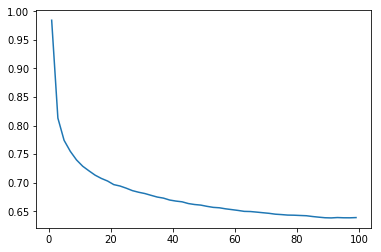

In [201]:
plt.plot(range(1,100,2), knn_scores)

### Date Recorded

It's possible that the date recorded contains some information about the target. For example, it may have taken researchers longer to visit remote areas.

In [208]:
df_train['year_recorded'] = df_train['date_recorded'].apply(lambda x: int(x.split('-')[0]))
pd.crosstab(df_train['year_recorded'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
year_recorded,,,
2002,1.000000,0.000000,0.000000
2004,0.333333,0.033333,0.633333
2011,0.565669,0.063193,0.371138
2012,0.486613,0.056351,0.457036
2013,0.531581,0.088253,0.380166


In [207]:
df_train['month_recorded'] = df_train['date_recorded'].apply(lambda x: int(x.split('-')[1]))
pd.crosstab(df_train['month_recorded'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
month_recorded,,,
1,0.410607,0.127007,0.462386
2,0.552088,0.075310,0.372601
3,0.616525,0.050178,0.333296
4,0.516373,0.110327,0.373300
5,0.601190,0.029762,0.369048
6,0.780347,0.026012,0.193642
7,0.501588,0.079244,0.419169
8,0.510999,0.075208,0.413793
9,0.652439,0.030488,0.317073


In [211]:
from dateutil import parser
df_train['weekday_recorded'] = df_train['date_recorded'].apply(lambda x: str(parser.parse(x).weekday()))
pd.crosstab(df_train['weekday_recorded'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
weekday_recorded,,,
0,0.532207,0.074789,0.393004
1,0.556928,0.067278,0.375794
2,0.553521,0.073875,0.372604
3,0.547476,0.077482,0.375043
4,0.532494,0.068050,0.399456
5,0.555515,0.069319,0.375166
6,0.519675,0.078567,0.401758


In [213]:
days = df_train['date_recorded'].value_counts()
df_train['day_record_count'] = [days[day] for day in df_train['date_recorded']]
pd.crosstab(df_train['day_record_count'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
day_record_count,,,
1,0.542857,0.000000,0.457143
2,0.000000,0.000000,1.000000
4,0.625000,0.000000,0.375000
5,0.400000,0.000000,0.600000
6,0.166667,0.000000,0.833333
7,0.285714,0.142857,0.571429
8,0.375000,0.000000,0.625000
9,0.555556,0.000000,0.444444
10,0.600000,0.000000,0.400000


In [222]:
# what about difference in construction year to inspection year?
df_train['years_since_construction'] = [record - construction if construction > 1900 
                                        else 100 for record, construction in 
                                        zip(df_train['year_recorded'], df_train['construction_year'])]
pd.crosstab(df_train['years_since_construction'], df_train['status_group'], normalize='index')

status_group,functional,functional needs repair,non functional
years_since_construction,,,
-7,1.000000,0.000000,0.000000
-5,0.666667,0.000000,0.333333
-4,0.500000,0.000000,0.500000
-3,0.000000,0.000000,1.000000
-2,0.000000,0.000000,1.000000
-1,0.000000,0.000000,1.000000
0,0.702381,0.018707,0.278912
1,0.761615,0.028658,0.209726
2,0.751527,0.040864,0.207609


## Putting It All Together - Data Wrangling

The goal of this exploration is to engineer better features. We'll create a function as we go along with new features that we may want to include, or features that we want to discard.

In [238]:
def map_installer(installer):
    
    unknown = ['0', 'unknown']
    
    if installer in unknown:
        return 'unknown'
    
    government = ['government ', 'government', 'dwe', 'hesawa', 'rwe', 'central government', 'lga',
                 'district council', 'gover', 'gove', 'gov', 'district water department',
                 'sengerema water department', 'distri', 'centr', 'distric water department',
                 'tasaf']
    
    if installer in government:
        return 'government'
    
    community = ['community', 'commu', 'villagers', 'twesa']
    
    if installer in community:
        return 'community'
    
    religious = ['church of disciples', 'kkkt', 'world vision', 'rc church', 'rc', 'tcrs',
                'dmdd']
    
    if installer in religious:
        return 'religious'
    
    international = ['norad', 'fini water', 'danida', 'danid', 'ces', 'kuwait',
                    'finw']
    
    if installer in international:
        return 'international'
    
    private = ['private', 'privat', 'kiliwater', 'wedeco']
    
    if installer in private:
        return 'private'
    
    aid = ['roman', 'amref', 'world bank', 'unicef', 'oxfam']
    
    if installer in aid:
        return 'aid'
    
    
    return 'other'

def wrangle(X, X_train):
    """
    Takes in the raw water pump features and returns an enhanced dataframe
    
    We also need to pass in the training data for some functions, such as getting top value_counts.
    
    When wrangling the training set, we will pass two copies of the training data
    
    """
    X = X.copy()
    X_train = X_train.copy()
    
    ### date recorded ###
    X['year_recorded'] = X['date_recorded'].apply(lambda x: int(x.split('-')[0]))
    X['years_since_construction'] = [record - construction if construction > 1900 
                                        else 100 for record, construction in 
                                        zip(X['year_recorded'], X['construction_year'])]
    
    days = X_train['date_recorded'].value_counts()
    X['day_record_count'] = [days[day] if day in days.index else 0 for day in X['date_recorded']]
    X['month_recorded'] = X['date_recorded'].apply(lambda x: int(x.split('-')[1]))
    
    ### funder / installer ###
    # convert all strings to lowercase
    X['funder'], X['installer'] = X['funder'].str.lower(), X['installer'].str.lower()
    X['funded_and_installed'] = np.where(X['funder'] == X['installer'], True, False)
    # encode into categories
    X['funder_cat'] = X['funder'].apply(map_installer)
    X['installer_cat'] = X['installer'].apply(map_installer)
    
    # drop full feature sets
    X = X.drop(['funder', 'installer'])
    
#     top_funders, top_installers = X_train['funder'].str.lower().value_counts().index[:20], X_train['installer'].str.lower().value_counts().index[:20]
#     X['funder'] = ['other' if funder not in top_funders else funder for funder in X['funder']]
#     X['installer'] = ['other' if installer not in top_installers else installer for installer in X['installer']]
    
    ### total static head ###
    X['tsh_zero'] = X['amount_tsh'] == 0.0
#     X['log_amount_tsh'] = np.log(X['amount_tsh']) <- has problems with 0
    
    ### waterpoint name ###
    X['wpt_name'] = X['wpt_name'].str.lower()
    top_wpt = X_train['wpt_name'].str.lower().value_counts().index[:50]
    X['wpt_name'] = ['other' if wpt_name not in top_wpt else wpt_name for wpt_name in X['wpt_name'].str.lower()]
    
    ### population ###
    X['population_unknown'] = X['population'] == 0
    X['population'].replace(0, np.nan, inplace=True)
    X["population"].fillna(X_train.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)

    X["population"].fillna(X_train.groupby(['region'])["population"].transform("median"), inplace=True)

    X["population"].fillna(X_train["population"].median(), inplace=True)

    
    ### subvillage ###
    # encode unknown as binary
    X['subvillage_unknown'] = X['subvillage'].isnull()
    # encode top 50, everything else as other
    X['subvillage'] = X['subvillage'].str.lower()
    sub_villages_count = X_train['subvillage'].str.lower().value_counts()
    X['subvillage_waterpoints'] = [sub_villages_count[vill] if vill in sub_villages_count.index else 0 for vill in X['subvillage'].str.lower()]
    
    top_subvillage = X_train['subvillage'].str.lower().value_counts().index[:50]
    X['subvillage'] = ['other' if vill not in top_subvillage else vill for vill in X['subvillage'].str.lower()]
    
    ### region code ###
    # encode region codes as strings, which will be automatically one hot encoded later
    X['region_code'] = X['region_code'].astype(str)
    X = X.drop('region', axis=1)
    
    ### district code ###
    # encode district codes as strings, which will be automatically one hot encoded later
    X['district_code'] = X['district_code'].astype(str)
    
    ### lga ###
    X['lga'] = X['lga'].str.lower()
    # encode urban and rural
    X['lga_rural'] = [lga.find('rural') != -1 for lga in X['lga']]
    X['lga_urban'] = [lga.find('urban') != -1 for lga in X['lga']]
    # encode anything except the top 30 as other
    top_lga = X_train['lga'].str.lower().value_counts().index[:30]
    X['lga'] = ['other' if lga not in top_lga else lga for lga in X['lga'].str.lower()]
    
    ### ward ###
    # create new variable with the number of waterpoints in a given ward
    ward_counts = X_train['ward'].str.lower().value_counts()
    X['ward_wpt_count'] = [ward_counts[ward] if ward in ward_counts.index else 0 for ward in X['ward'].str.lower()]
    
    
    ### public meeting ###
    X['public_meeting_unknown'] = X['public_meeting'].isnull() # encode missing vals to a binary var
    X['public_meeting'] = X['public_meeting'].fillna(False) # fill na with false
    
    ### recorded by ###
    X = X.drop('recorded_by', axis=1) # drop it, all the same value
    
    ### permit ###
    X['permit_unknown'] = X['permit'].isnull() # encode missing vals to a binary var
    X['permit'] = X['permit'].fillna(False) # fill na with false
    
    ### scheme name/management ###
    X['scheme_management'] = X['scheme_management'].fillna('None') # encode nulls as 'None'
    X = X.drop('scheme_name', axis=1)
    
    ### construction year ###
    X['construction_unknown'] = X['construction_year'] < 1900
#     X['early60s'] = X['construction_year'].between(1900, 1964)
#     X['late60s'] = X['construction_year'].between(1965, 1969)
#     X['early70s'] = X['construction_year'].between(1970, 1974)
#     X['late70s'] = X['construction_year'].between(1975, 1979)
#     X['early80s'] = X['construction_year'].between(1980, 1984)
#     X['late80s'] = X['construction_year'].between(1985, 1989)
#     X['early90s'] = X['construction_year'].between(1990, 1994)
#     X['late90s'] = X['construction_year'].between(1995, 1999)
#     X['early00s'] = X['construction_year'].between(2000, 2004)
#     X['late00s'] = X['construction_year'].between(2005, 2009)
#     X['early10s'] = X['construction_year'].between(2010, 2014)
#     X = X.drop('construction_year', axis=1)
    
    ### extraction type ###
    X = X.drop(['extraction_type_group', 'extraction_type_class'], axis=1)
    
    ### management ###
    X = X.drop('management_group', axis=1)
    
    ### payment ###
    X = X.drop('payment_type', axis=1)
    
    ### quality ###
    X = X.drop(['quality_group', 'quantity_group'], axis=1)
    
    ### source ###
    X = X.drop(['source_type', 'source_class'], axis=1)
    
    ### waterpoint type ###
    X = X.drop('waterpoint_type_group', axis=1)
    
    ### longitude/latitude/gps_height ###
    X['gps_height_bad'] = X['gps_height'] <= 0.0 # min height should be sea level
    X['latitude_bad'] = X['latitude'] < 25.0
    X['longitude_bad'] = X['longitude'] > -0.5
    
    # fill in missing values based on location - STOLEN FROM BREADWARD
    
#     training_data["gps_height"].fillna(training_data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
#     training_data["gps_height"].fillna(training_data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
#     training_data["gps_height"].fillna(training_data["gps_height"].mean(), inplace=True)
#     training_data["amount_tsh"].fillna(training_data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
#     training_data["amount_tsh"].fillna(training_data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
#     training_data["amount_tsh"].fillna(training_data["amount_tsh"].median(), inplace=True)
#     training_data["latitude"].fillna(training_data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
#     training_data["longitude"].fillna(training_data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
#     training_data["longitude"].fillna(training_data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
    
    
    
    ### DROPPING AFTER FEATURE ENGINEERING ####
    X = X.drop('date_recorded', axis=1)
  
    return X # returned wrangled dataframe

# testing
df_raw = pd.read_csv('train_features.csv', index_col=0)
df_test_raw = pd.read_csv('test_features.csv', index_col=0)
df_wrangled_test = wrangle(df_test_raw, df_raw)
df_wrangled = wrangle(df_raw, df_raw)
assert df_wrangled.shape[1] == df_wrangled_test.shape[1]
df_wrangled.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,year_recorded,years_since_construction,day_record_count,month_recorded,funding_unknown,installer_unknown,funded_and_installed,tsh_zero,population_unknown,subvillage_unknown,subvillage_waterpoints,lga_rural,lga_urban,ward_wpt_count,public_meeting_unknown,permit_unknown,construction_unknown,gps_height_bad,latitude_bad,longitude_bad
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,other,1390,other,34.938093,-9.856322,none,0,Lake Nyasa,other,11,5,other,Mundindi,109.0,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,2011,12,520,3,False,False,True,False,False,False,6,False,False,36,False,False,False,False,True,True
8776,0.0,other,1399,other,34.698766,-2.147466,zahanati,0,Lake Victoria,other,20,2,serengeti,Natta,280.0,False,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,132,3,False,False,True,True,False,False,5,False,False,71,True,False,False,False,True,True
34310,25.0,other,686,world vision,37.460664,-3.821329,other,0,Pangani,majengo,21,4,other,Ngorika,250.0,True,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,2013,4,277,2,False,False,False,False,False,False,502,False,False,10,False,False,False,False,True,True
67743,0.0,unicef,263,other,38.486161,-11.155298,other,0,Ruvuma / Southern Coast,other,90,63,other,Nanyumbu,58.0,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,27,376,1,False,False,True,True,False,False,17,False,False,32,False,False,False,False,True,True
19728,0.0,other,0,other,31.130847,-1.825359,shuleni,0,Lake Victoria,other,18,1,karagwe,Nyakasimbi,0.0,True,None,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,100,240,7,False,False,False,True,True,False,2,False,False,13,False,False,True,True,True,True


## Feature Engineering Test

Let's re-run that first Logistic Regression pipeline with our new features.

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, make_scorer

from sklearn.model_selection import GridSearchCV, validation_curve, learning_curve
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression

import category_encoders as ce

In [149]:
df_raw = pd.read_csv('train_features.csv', index_col=0)
df_test_raw = pd.read_csv('test_features.csv', index_col=0)
X_train, X_test = wrangle(df_raw, df_raw), wrangle(df_test_raw, df_raw)
y_train = pd.read_csv('train_labels.csv', index_col=0)

In [150]:
# fit pipeline
pipe_log_reg2 = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                              StandardScaler(),
                              LogisticRegression(solver='lbfgs',
                              max_iter=500)).fit(X_train, y_train)

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zach

In [152]:
# report train and validation accuracy
print ('Training Accuracy Score %.3f' % (pipe_log_reg2.score(X_train, y_train)))

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Training Accuracy Score 0.795


In [154]:
y_submit_logistic_v2 = pipe_log_reg2.predict(X_test)
df_logistic = pd.DataFrame(data=y_submit_logistic_v2, index=X_test.index, columns=['status_group'])
df_logistic.to_csv('logistic_regression_feature_engineering_submission.csv')

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [156]:
# # SUBMIT!
# %env KAGGLE_CONFIG_DIR=/Users/zach/Kaggle
# !kaggle competitions submit -c ds1-predictive-modeling-challenge -f logistic_regression_feature_engineering_submission.csv -m 'logistic regression basic classifier with feature engineering'

env: KAGGLE_CONFIG_DIR=/Users/zach/Kaggle
100%|█████████████████████████████████████████| 263k/263k [00:01<00:00, 220kB/s]
Successfully submitted to DS1 Predictive Modeling Challenge

In [234]:
df_train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity